# Deep Deterministic Policy Gradients Agent for Step Response

Trains a [Deep Deterministic Policy Gradients](https://arxiv.org/abs/1509.02971) model to solve a simple step-response problem in the shared Bullet simulation. A [Tensorboard](https://www.tensorflow.org/tensorboard) visualisation is hosted [**here**](http://0.0.0.0:6006/#scalars) in order to track training progress.

## Environment Setup and Start of Training Sequence

In [1]:
# Set matplotlib to inline mode and import necessary python components
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

import os
import time
import sys
sys.path.append("/catkin_ws/src/jointcontrol/scripts")

# Import gym, the custom gym environment and the discrete env wrapper
import gym
import gym_jointcontrol
import numpy as np
from discreteActionWrapper import *

# Import DDPG implementation
# These imports will throw a lot of warnings, since we are using Python 3.7 instead of 3.8
from stable_baselines.ddpg.policies import MlpPolicy
from stable_baselines.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise, AdaptiveParamNoiseSpec
from stable_baselines import DDPG

# Instantiate gym environment and reset it
env = gym.make('jointcontrol-v0', jointidx=0)
env.reset()

# Start tensorboard to allow for visualisation of training process
os.system("tensorboard --logdir /training_tensorboard/ --host 0.0.0.0 --port 6006 &")

# Create DDPG noise objects. They are scaled to [-1, 1] in the shape [numParams,]
n_actions = env.action_space.shape[-1]
param_noise = None
action_noise = OrnsteinUhlenbeckActionNoise(mean=np.zeros(n_actions), sigma=float(0.5) * np.ones(n_actions))

# Instantiate model and start training
# DDPG example based on https://stable-baselines.readthedocs.io/en/master/modules/ddpg.html
model = DDPG(MlpPolicy, env, tensorboard_log="/training_tensorboard/", verbose=1, param_noise=param_noise, action_noise=action_noise)
model.learn(total_timesteps=10000)

/root/myenv/lib/python3.7/site-packages/ale_py/roms/utils.py:90: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for external in metadata.entry_points().get(self.group, []):


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/root/myenv/lib/python3.7/site-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."
pybullet build time: Dec  1 2021 18:33:04






Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.Dense instead.




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








TensorBoard 1.15.0 at http://0.0.0.0:6006/ (Press CTRL+C to quit)


--------------------------------------
| reference_Q_mean        | -1.31    |
| reference_Q_std         | 2.16     |
| reference_action_mean   | -0.5     |
| reference_action_std    | 0.79     |
| reference_actor_Q_mean  | -0.463   |
| reference_actor_Q_std   | 0.737    |
| rollout/Q_mean          | -0.992   |
| rollout/actions_mean    | -0.196   |
| rollout/actions_std     | 0.757    |
| rollout/episode_steps   | 41       |
| rollout/episodes        | 243      |
| rollout/return          | -34.8    |
| rollout/return_history  | -25.3    |
| total/duration          | 230      |
| total/episodes          | 243      |
| total/epochs            | 1        |
| total/steps             | 9998     |
| total/steps_per_second  | 43.5     |
| train/loss_actor        | 0.457    |
| train/loss_critic       | 0.574    |
| train/param_noise_di... | 0        |
--------------------------------------



W0213 13:44:31.784113 140548724004608 plugin_event_accumulator.py:294] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.


## Test trained Model

The trained model can then be tested using the controllerTest module from the jointcontrol package. This module allows for step response and stability testing of the resulting controller and generates a test report.

Testepisode done. Resulting params are [40.  0.  0.  0.  0.  1.  0.  0.  0.]
{'lowerSignal': 0, 'higherSignal': -1.57, 'pulseLength': 100, 'numPulses': 2, 'maxSteps': 40}
{'lowerSignal': 0, 'higherSignal': -1.57, 'pulseLength': 20, 'numPulses': 10, 'maxSteps': 40}
{'lowerSignal': 0, 'higherSignal': -1.57, 'pulseLength': 10, 'numPulses': 20, 'maxSteps': 40}
{'lowerSignal': 0, 'higherSignal': -1.57, 'pulseLength': 5, 'numPulses': 40, 'maxSteps': 40}
{'lowerSignal': 0, 'higherSignal': -1.57, 'pulseLength': 2, 'numPulses': 100, 'maxSteps': 40}


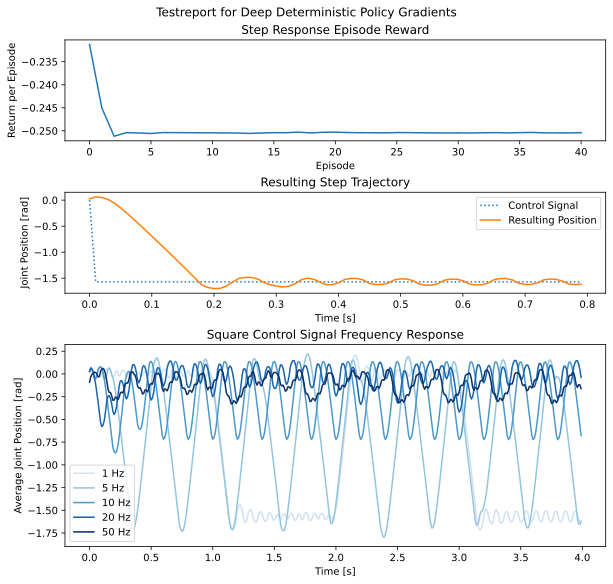

In [2]:
# Import controllerTest module from jointcontrol package
import sys
sys.path.append("/catkin_ws/src/jointcontrol/scripts")
from controllerTest import *

# Reset environment, instantiate controllerTest and visualise results
env.reset()
test = controllerTest(env, model, "Deep Deterministic Policy Gradients")
test.plotResults(gui=True)

<center>____________________________________________________________________________________________________________________________</center>
<center><a href="../documentation.html">Main Page</a></center>